[![Run Jupyter Notebooks](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/RichardPotthoff/Notebooks/main?filepath=IR_camera.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RichardPotthoff/Notebooks/blob/main/IR_camera.ipynb)

In [1]:
T_Reflector=273.17+18
T_Object=273.15+32
emissivity=0.85
T_MirrorImage=(emissivity*T_Reflector**4+(1-emissivity)*T_Object**4)**(1/4)
print(f'{T_MirrorImage-273.15 = :0.2f}°C')

T_MirrorImage-273.15 = 20.25°C


In [2]:
T_Reflector=273.17+18
T_Object=273.15+32
T_MirrorImage=273.15+20.25
emissivity=(T_MirrorImage**4-T_Object**4)/(T_Reflector**4-T_Object**4)
print(f'{emissivity  = :0.3f}\nreflectivity= {1.0-emissivity:0.3f}') 

emissivity  = 0.850
reflectivity= 0.150


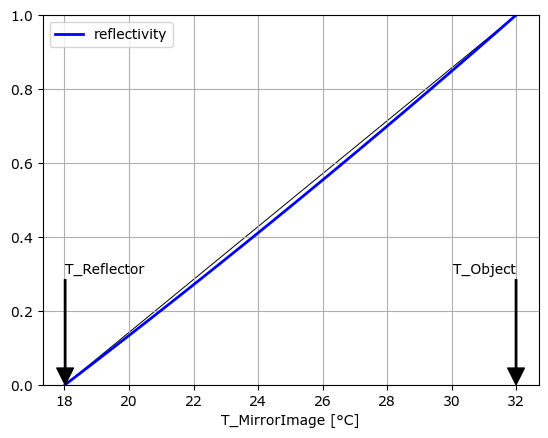

In [3]:
import numpy as np
from matplotlib import pyplot as plt
def reflectivity(T_MirrorImage=273.15+20.25, T_Reflector=273.17+18, T_Object=273.15+32):
    return (T_Reflector**4-T_MirrorImage**4)/(T_Reflector**4-T_Object**4)
#print(f'{reflectivity(T_MirrorImage=273.15+20.25, T_Reflector=273.17+18, T_Object=273.15+32) = :0.3f}')
T_Reflector=273.17+18
T_Object=273.15+32
T_MirrorImage=np.linspace(T_Reflector,T_Object,21)
plt.close()
plt.plot(T_MirrorImage-273.15,reflectivity(T_MirrorImage),'b',lw=2,label='reflectivity')
plt.plot([T_Reflector-273.15,T_Object-273.15],[0.0,1.0],'k',lw=0.7,zorder=-1 )
plt.xlabel('T_MirrorImage [°C]')
plt.gca().annotate('T_Reflector', xy=(T_Reflector-273.15,0), xytext=(T_Reflector-273.15+0.0*(T_Object-T_Reflector),0.3),
            arrowprops=dict(facecolor='black',width=1))
plt.gca().annotate('T_Object', xy=(T_Object-273.15,0), xytext=(T_Reflector-273.15+1.0*(T_Object-T_Reflector),0.3),
            arrowprops=dict(facecolor='black',width=1),ha='right')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()
plt.close()

In [4]:
print('Glas:')
print(f'{reflectivity(273.15 + 18.6, 273.15 + 16.8, 273.15 + 28.5) = :0.3f}')
print(f'{reflectivity(273.15 + 19.1, 273.15 + 17.2, 273.15 + 28.3) = :0.3f}')

Glas:
reflectivity(273.15 + 18.6, 273.15 + 16.8, 273.15 + 28.5) = 0.146
reflectivity(273.15 + 19.1, 273.15 + 17.2, 273.15 + 28.3) = 0.163


In [5]:
print('Alufolie:')
print(f'{reflectivity(273.15 + 30.1, 273.15 + 18.4, 273.15 + 30.4) = :0.3f}')
print(f'{reflectivity(273.15 + 29.8, 273.15 + 18.7, 273.15 + 30.7) = :0.3f}')
print(f'{reflectivity(273.15 + 31.4, 273.15 + 19.4, 273.15 + 32.4) = :0.3f}')

Alufolie:
reflectivity(273.15 + 30.1, 273.15 + 18.4, 273.15 + 30.4) = 0.974
reflectivity(273.15 + 29.8, 273.15 + 18.7, 273.15 + 30.7) = 0.921
reflectivity(273.15 + 31.4, 273.15 + 19.4, 273.15 + 32.4) = 0.918


In [6]:
import sympy as sp
T_Reflector,T_Object1,T_MirrorImage1,T_Object2,T_MirrorImage2,emissivity=sp.symbols('T_R,T_O1,T_M1,T_O2,T_M2,ε')
T_Reflector4=sp.solve((1-reflectivity(T_MirrorImage1,T_Reflector,T_Object1)).simplify()-emissivity,T_Reflector**4)[0].simplify()
em2=(1-reflectivity(T_MirrorImage2,T_Reflector,T_Object2)).simplify()
em2=em2.subs(T_Reflector**4,T_Reflector4)
print('reflectivity=')
ρ=(1-sp.solve(em2-emissivity,emissivity)[0]).simplify()
print(ρ)
print(sp.latex(ρ))
display(ρ)
print()
print('T_Reflector**4:')
T_R4=T_Reflector4.subs(emissivity,1-ρ).simplify()
print(T_R4)
print(sp.latex(T_R4))
display(T_R4)

reflectivity=
(T_M1**4 - T_M2**4)/(T_O1**4 - T_O2**4)
\frac{T_{M1}^{4} - T_{M2}^{4}}{T_{O1}^{4} - T_{O2}^{4}}


(T_M1**4 - T_M2**4)/(T_O1**4 - T_O2**4)


T_Reflector**4:
(T_M1**4*T_O2**4 - T_M2**4*T_O1**4)/(T_M1**4 - T_M2**4 - T_O1**4 + T_O2**4)
\frac{T_{M1}^{4} T_{O2}^{4} - T_{M2}^{4} T_{O1}^{4}}{T_{M1}^{4} - T_{M2}^{4} - T_{O1}^{4} + T_{O2}^{4}}


(T_M1**4*T_O2**4 - T_M2**4*T_O1**4)/(T_M1**4 - T_M2**4 - T_O1**4 + T_O2**4)

In [11]:
from IPython.display import Markdown,Latex
display(Markdown(f"$$T_\\mathrm {{MirrorImage}} ^4 = \\rho \\cdot T_\\mathrm {{Object}}^4+ (1-\\rho)\\cdot T_\\mathrm{{Reflector}}^4 $$"
                 f"$$\\rho ={sp.latex(ρ)}$$" 
                 f"$$T_\\mathrm R = \\left({sp.latex(T_R4)}\\right)^\\frac 1 4$$"))

$$T_\mathrm {MirrorImage} ^4 = \rho \cdot T_\mathrm {Object}^4+ (1-\rho)\cdot T_\mathrm{Reflector}^4 $$$$\rho =\frac{T_{M1}^{4} - T_{M2}^{4}}{T_{O1}^{4} - T_{O2}^{4}}$$$$T_\mathrm R = \left(\frac{T_{M1}^{4} T_{O2}^{4} - T_{M2}^{4} T_{O1}^{4}}{T_{M1}^{4} - T_{M2}^{4} - T_{O1}^{4} + T_{O2}^{4}}\right)^\frac 1 4$$

In [8]:
def ρ_TR_C(T_O1_C, T_O2_C, T_M1_C, T_M2_C):
    "Calculate the reflectivity and reflector temperature from the temperatures of 2 objects "
    "and the temperatures of the objects' mirror images. All temperatures in °C." 
    T_O1_4, T_O2_4, T_M1_4, T_M2_4 = ((T_C+273.15)**4 for T_C in (T_O1_C, T_O2_C, T_M1_C, T_M2_C))#convert °C to Kelvin**4
    return (T_M1_4 - T_M2_4)/(T_O1_4 - T_O2_4),((T_M1_4*T_O2_4 - T_M2_4*T_O1_4)/(T_M1_4 - T_M2_4 - T_O1_4 + T_O2_4))**0.25-273.15
print(f'{ρ_TR_C(T_O1_C= 28.5, T_O2_C= 16.8, T_M1_C= 18.6, T_M2_C= 16.8) = }')   

ρ_TR_C(T_O1_C= 28.5, T_O2_C= 16.8, T_M1_C= 18.6, T_M2_C= 16.8) = (0.14619538625991127, 16.799999999999955)


In [9]:
DTO,DTM,TOm,TMm=sp.symbols('ΔT_O,ΔT_M,T_O,T_M') 
(ρ/((T_MirrorImage2-T_MirrorImage1)/(T_Object2-T_Object1))).subs(\
    {T_Object1:(TOm-DTO/2),\
     T_Object2:(TOm+DTO/2),\
     T_MirrorImage1:(TMm-DTM/2),\
     T_MirrorImage2:(TMm+DTM/2)
    }).simplify()

T_M*(4*T_M**2 + ΔT_M**2)/(T_O*(4*T_O**2 + ΔT_O**2))

|Symbol | Description|
|---|---|
|$\rho$|Reflectivity|
|$\epsilon$|Emissivity|
|$T_{\mathrm O i}$|Temperature of Object i|
|$T_{\mathrm M i}$|Temperature of Mirror Image of Object i|
|$T_\mathrm R$|Temperature of Reflector (Mirror)|
|$\overline{T_{\mathrm O}}$|Average Temperature of Objects|
|$\Delta T_{\mathrm O}$|Temperature Difference between Objects|
|$\overline{T_{\mathrm M}}$|Average Temperature of Mirror Images of the Objects|
|$\Delta T_{\mathrm M}$|Temperature Difference between the Mirror Images of the Objects|


$$\rho\:=\:\frac{T_{\mathrm M1}^{4} - T_{\mathrm M2}^{4}}{T_{\mathrm O1}^{4} - T_{\mathrm O2}^{4}}\;=\;
\left(\frac{T_{\mathrm M1}^{2} - T_{\mathrm M2}^{2}}{T_{\mathrm O1}^{2} - T_{\mathrm O2}^{2}}\right)\cdot\left(\frac{T_{\mathrm M1}^{2} + T_{\mathrm M2}^{2}}{T_{\mathrm O1}^{2} + T_{\mathrm O2}^{2}}\right)\;=\;
\left(\frac{T_{\mathrm M1} - T_{\mathrm M2}}{T_{\mathrm O1} - T_{\mathrm O2}}\right)\cdot\left(\left(\frac{T_{\mathrm M1} + T_{\mathrm M2}}{T_{\mathrm O1} + T_{\mathrm O2}}\right)\cdot\left(\frac{T_{\mathrm M1}^{2} + T_{\mathrm M2}^{2}}{T_{\mathrm O1}^{2} + T_{\mathrm O2}^{2}}\right)\right)
$$


|$~~~~~~~~$ substitutions: $~~~~~~~~~~$|
|---------------------|
|$T_{\mathrm O1}\;=\;\overline{T_{\mathrm O}}-\frac 1 2\Delta T_{\mathrm O}$|
|$T_{\mathrm O2}\;=\;\overline{T_{\mathrm O}}+\frac 1 2\Delta T_{\mathrm O}$|
|$T_{\mathrm M1}\;=\;\overline{T_{\mathrm M}}-\frac 1 2\Delta T_{\mathrm M}$|
|$T_{\mathrm M2}\;=\;\overline{T_{\mathrm M}}+\frac 1 2\Delta T_{\mathrm M}$|

$$\rho\:=\:\left(\frac{T_{\mathrm M1} - T_{\mathrm M2}}{T_{\mathrm O1} - T_{\mathrm O2}}\right)\cdot
\left(\left(\frac{2\overline{T_{\mathrm M}}}{2\overline{T_{\mathrm O}}}\right)\cdot
\left(\frac{2\overline{T_{\mathrm M}}^{2} + \frac 1 2\Delta T_{\mathrm M}^{2}}{2\overline{T_{\mathrm O}}^{2} + \frac 1 2\Delta T_{\mathrm O}^{2}}\right)\right)
$$


$\frac 1 2\Delta T_{\mathrm M}^{2}\ll2\overline{T_{\mathrm M}}^{2}$

$\frac 1 2\Delta T_{\mathrm O}^{2}\ll2\overline{T_{\mathrm O}}^{2}$

$$\rho\:\approx\:\left(\frac{T_{\mathrm M1} - T_{\mathrm M2}}{T_{\mathrm O1} - T_{\mathrm O2}}\right)\cdot
\left(\frac{\overline{T_{\mathrm M}}}{\overline{T_{\mathrm O}}}\right)^3
$$


$\frac{\overline{T_{\mathrm M}}}{\overline{T_{\mathrm O}}}\approx 1$

$$\rho\:\approx\approx\:\left(\frac{T_{\mathrm M1} - T_{\mathrm M2}}{T_{\mathrm O1} - T_{\mathrm O2}}\right)
$$
